In [1]:
# importing the required modules
using Plots
using Printf

In [2]:
# make prediction
function calc_h0(x,theta)
    return x*theta;
end;

In [3]:
# calculate loss
function calc_loss(h0,y,n)
    return (1/(2n))*sum((h0-y).^2)
end;

In [4]:
# gradient descent
function calc_dw(h0,x,n)
    return transpose((transpose(h0-y)*x).*(1/n))
end;

In [5]:
# dataset
x = [ones(20) collect(1:20)];
y = ((x[:,2].*3).+ 5)+rand(-2:2,size(x)[1]);
@printf("shape of x is (%d,%d)",size(x)[1],size(x)[2]);

shape of x is (20,2)

In [6]:
# weights initialization
theta = rand(2)
@printf("shape of theta is %d",length(theta));

shape of theta is 2

In [7]:
# hyper parameters
epochs = 300
alpha = 0.001
costovertime = []

#training loop
for i in (1:epochs)

    # make prediction
    h0 = calc_h0(x,theta);
    
    # calculate cost
    cost = calc_loss(h0,y,length(y));
    push!(costovertime,cost)
    
    # weight update
    dw = calc_dw(h0,x,size(x)[1]);
    theta = theta - alpha.*(dw)
    
    if(i%(epochs/10) == 0)
        
       @printf("Iteration : %d          loss:%f\n",i,cost); 
    end
end;

Iteration : 30          loss:2.751747
Iteration : 60          loss:2.669680
Iteration : 90          loss:2.645141
Iteration : 120          loss:2.620943
Iteration : 150          loss:2.597078
Iteration : 180          loss:2.573540
Iteration : 210          loss:2.550326
Iteration : 240          loss:2.527430
Iteration : 270          loss:2.504849
Iteration : 300          loss:2.482578


In [8]:
@printf("The equaltion of the line of best fit is %.2fx+%.2f",theta[2],theta[1])

The equaltion of the line of best fit is 3.31x+1.21

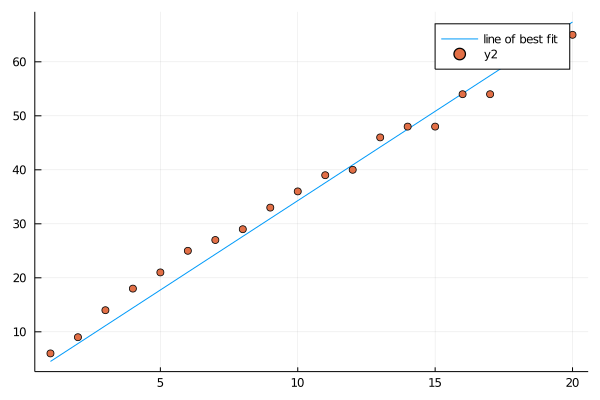

In [9]:
# line of best fit
plot!(x[:,2],calc_h0(x,theta),label="line of best fit")
plot!(x[:,2],y,seriestype="scatter")

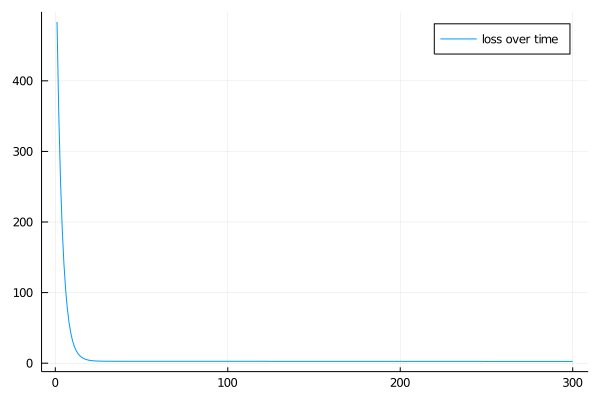

In [10]:
# loss over time
plot(costovertime,label="loss over time")